# Analysis of British Airways

## Importing the libraries

In [2]:
import requests
import re 
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction import text 

## Web Scrapping

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 25
page_size = 100

reviews = []
stars = []
country = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    for item in soup.find_all("div", {"class": "text_content"}):
        reviews.append(item.get_text())

    for item in soup.find_all("div", {"class": "rating-10"}):
        try:
            stars.append(item.span.text)
        except:
            stars.append("None")
    
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

## Data Preprocessing

### Checking the lenth of each column

In [4]:
print(len(reviews))
print(len(stars))
print(len(country))

2500
2525
2500


### Cleaning the Star Series

In [5]:
star = pd.Series(stars)
star.unique()
star.value_counts()
star = star[star != '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5']
star.value_counts()
star= star.astype('int')

In [6]:
print(len(star))
print(len(reviews))
print(len(country))

2500
2500
2500


### Dataframe Creation

In [7]:
df = pd.DataFrame({"reviews":reviews,"stars": star, "country": country})
# df["reviews"] = reviews
# df["stars"] = star
# df["country"] = star
df.head()

,reviews,stars,country
1,Not Verified | Overall not bad. Staff look ti...,6,Canada
2,✅ Trip Verified | This was our first flight wi...,10,Australia
3,✅ Trip Verified | I recently encountered a hig...,1,United States
4,Not Verified | Beware! BA don't provide any r...,1,United States
5,✅ Trip Verified | Check in was chaotic and ba...,6,United Kingdom


### Checking the missing values

In [8]:
df.isnull().sum()

reviews    0
stars      0
country    0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

reviews    0
stars      0
country    0
dtype: int64

In [12]:
df.head(10)

,reviews,stars,country
1,Not Verified | Overall not bad. Staff look ti...,6,Canada
2,✅ Trip Verified | This was our first flight wi...,10,Australia
3,✅ Trip Verified | I recently encountered a hig...,1,United States
4,Not Verified | Beware! BA don't provide any r...,1,United States
5,✅ Trip Verified | Check in was chaotic and ba...,6,United Kingdom
6,Not Verified | All 4 of our flights were fine ...,6,United Kingdom
7,cNot Verified | I had hoped this would be a g...,4,United States
8,✅ Trip Verified | I was going to fly to Frank...,1,United Kingdom
9,✅ Trip Verified | Much better experience this ...,8,United Kingdom
10,✅ Trip Verified | Once again a terrible busine...,3,United Kingdom


### Verification Column Creation

In [13]:
df['verification'] = df.reviews.str.contains("Trip Verified")

### Cleaning the Reviews

In [14]:
corpus = []

for rev in df['reviews']:
    rev = re.sub('[^a-zA-Z]',' ',rev)
    rev = rev.lower()
    rev = rev.split()

    #Stemming
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')

    rev = [ps.stem(word) for word in rev if not word in set(all_stopwords)] 
    rev = ' '.join(rev)
    corpus.append(rev)

df['corpus'] = corpus

In [11]:
df.to_csv("data/BA_reviews.csv")

## Data Analysis

### Total Verified and non Verfied Trips

In [36]:
df['verification'].value_counts()

verification
False    1330
True     1170
Name: count, dtype: int64

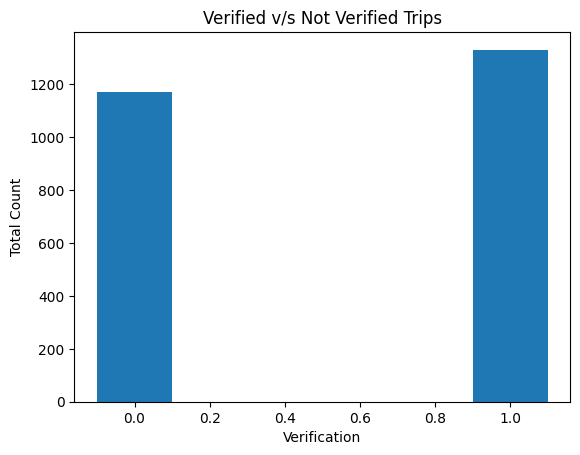

In [33]:
fig, ax = plt.subplots()
x=df['verification'].unique()[::-1]
y=df['verification'].value_counts()

ax.bar(x=x,height=y,width=0.2,align='center')
ax.set_xlabel("Verification")
ax.set_ylabel("Total Count")
ax.set_title("Verified v/s Not Verified Trips")
plt.show()

### Total Count for each rating

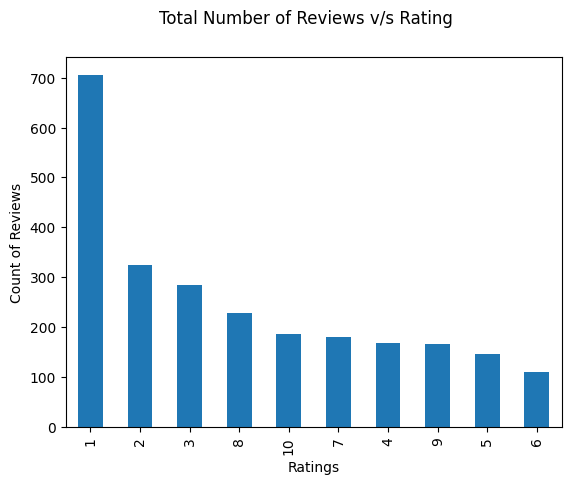

In [16]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel("Ratings")
plt.ylabel("Count of Reviews")
plt.suptitle("Total Number of Reviews v/s Rating")
plt.show()

In [17]:
country_review = pd.DataFrame(df['country'].value_counts().head()).reset_index()
country_review

,country,count
0,United Kingdom,1537
1,United States,310
2,Canada,82
3,Australia,78
4,Germany,55


### Top 5 Country Reviews

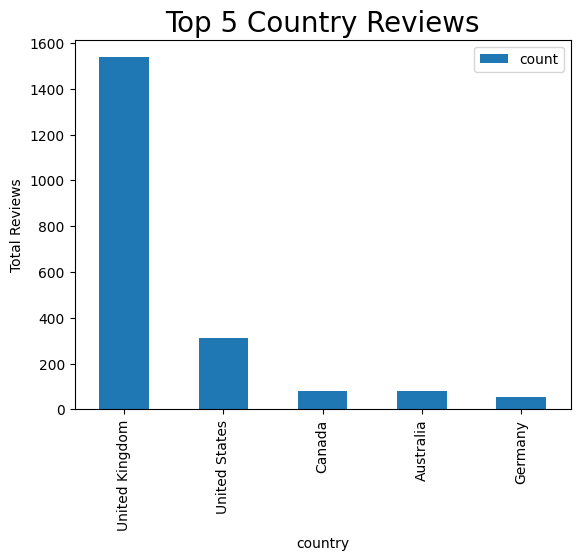

In [18]:
country_review.plot(x='country',kind='bar',align='center')
plt.xlabel("country")
plt.ylabel("Total Reviews")
plt.title("Top 5 Country Reviews",fontsize=20)
plt.show()

In [35]:
df['stars'].mean()

4.2908

In [19]:
country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()
country_rating

,country,stars
0,Finland,10.0
1,Senegal,10.0
2,Chile,10.0
3,Israel,9.0
4,Costa Rica,9.0
...,...,...
63,Bermuda,1.5
64,Nigeria,1.5
65,Ecuador,1.0
66,Bahrain,1.0


### Top 10 Countries with Average Highest Rating

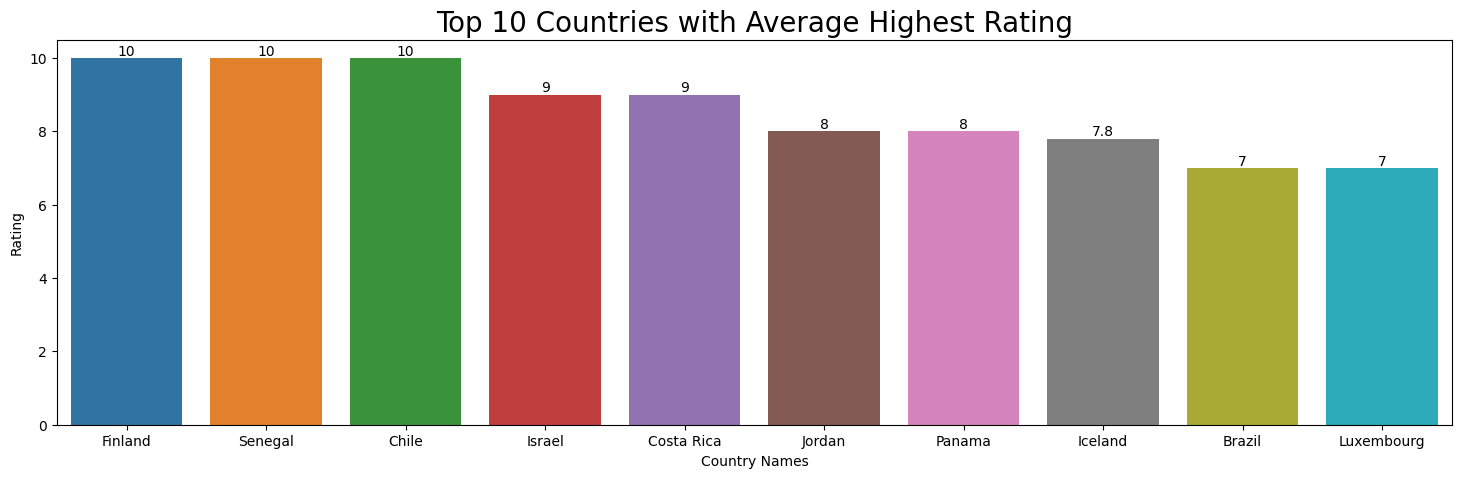

In [20]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='stars', data=country_rating[:10])
ax.bar_label(ax.containers[0])
plt.xlabel('Country Names')
plt.ylabel('Rating')
ax.set_title("Top 10 Countries with Average Highest Rating",fontsize=20)
plt.show()

### Top 10 Countries with Maximum Rating

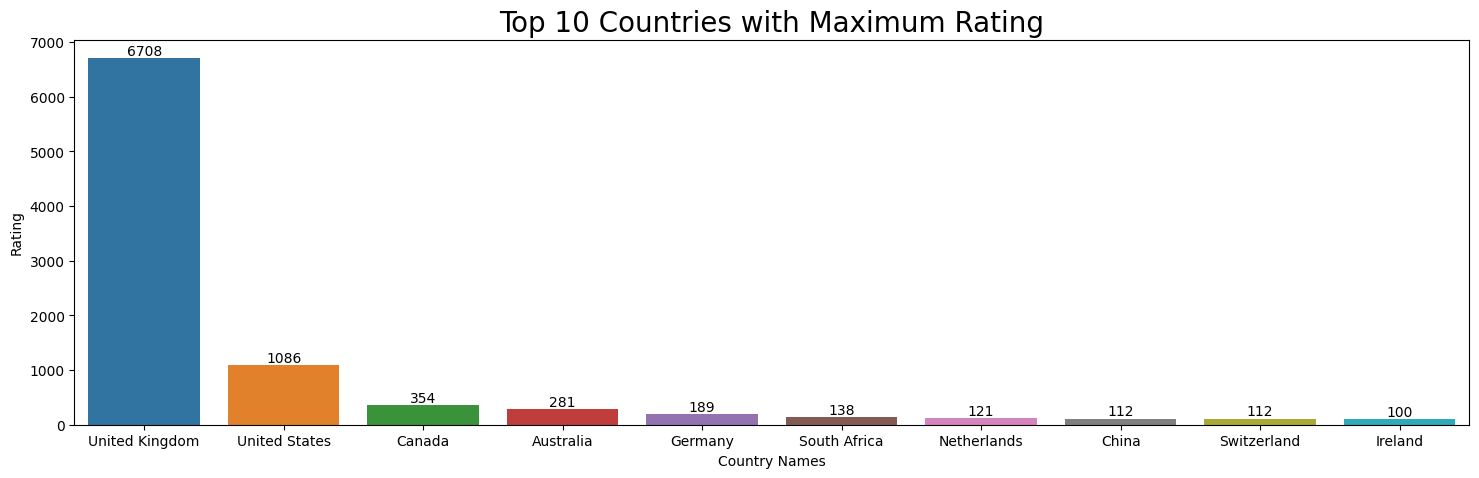

In [21]:
max_country_rating = pd.DataFrame(df.groupby('country')['stars'].sum().sort_values(ascending=False)).reset_index()
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='stars', data=max_country_rating[:10])
ax.bar_label(ax.containers[0])
plt.xlabel('Country Names')
plt.ylabel('Rating')
ax.set_title("Top 10 Countries with Maximum Rating",fontsize=20)
plt.show()

### Wordcloud analysis

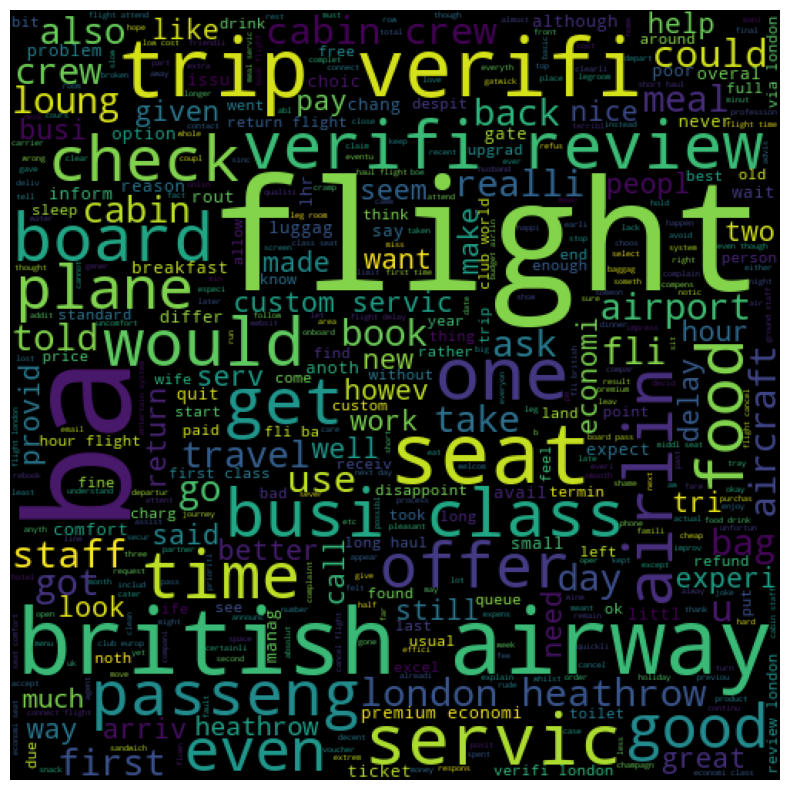

In [29]:
rev = " ".join(df.corpus)
plt.figure(figsize=(10,10))

stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(height=500,width=500,max_font_size=100,max_words=500,stopwords=stop_words).generate(rev)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

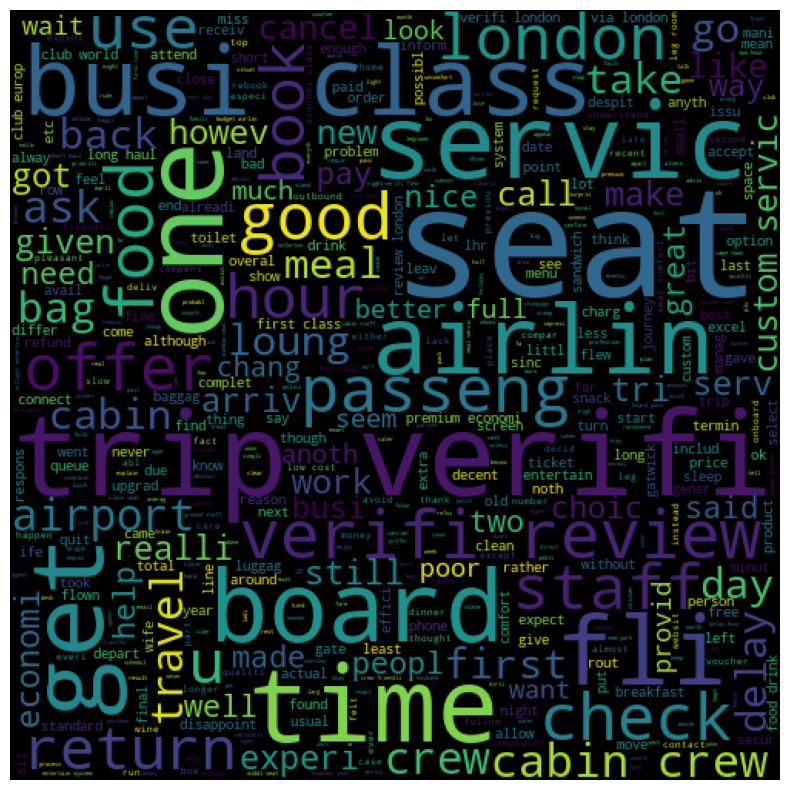

In [28]:
rev = " ".join(df.corpus)
plt.figure(figsize=(10,10))

stop_words = set(stopwords.words('english'))
stop_words.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                "london", "heathrow", "aircraft", "could","even", "would"])

wordcloud = WordCloud(height=500,width=500,max_font_size=100,max_words=500,stopwords=stop_words).generate(rev)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word Frequency

In [30]:
words = rev.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                        "heathrow","plane","lhr","review"])

new_words = []
for word in words:
    if word not in stopwords:
        new_words.append(word)

top_words = FreqDist(new_words).most_common(20)
all_fdist = pd.Series(dict(top_words))


In [31]:
all_fdist

seat       3074
verifi     2189
servic     2130
time       1714
trip       1517
food       1512
crew       1441
hour       1404
airlin     1368
class      1329
cabin      1303
good       1271
board      1255
check      1216
busi       1216
staff      1089
fli        1050
economi     962
offer       894
passeng     884
dtype: int64

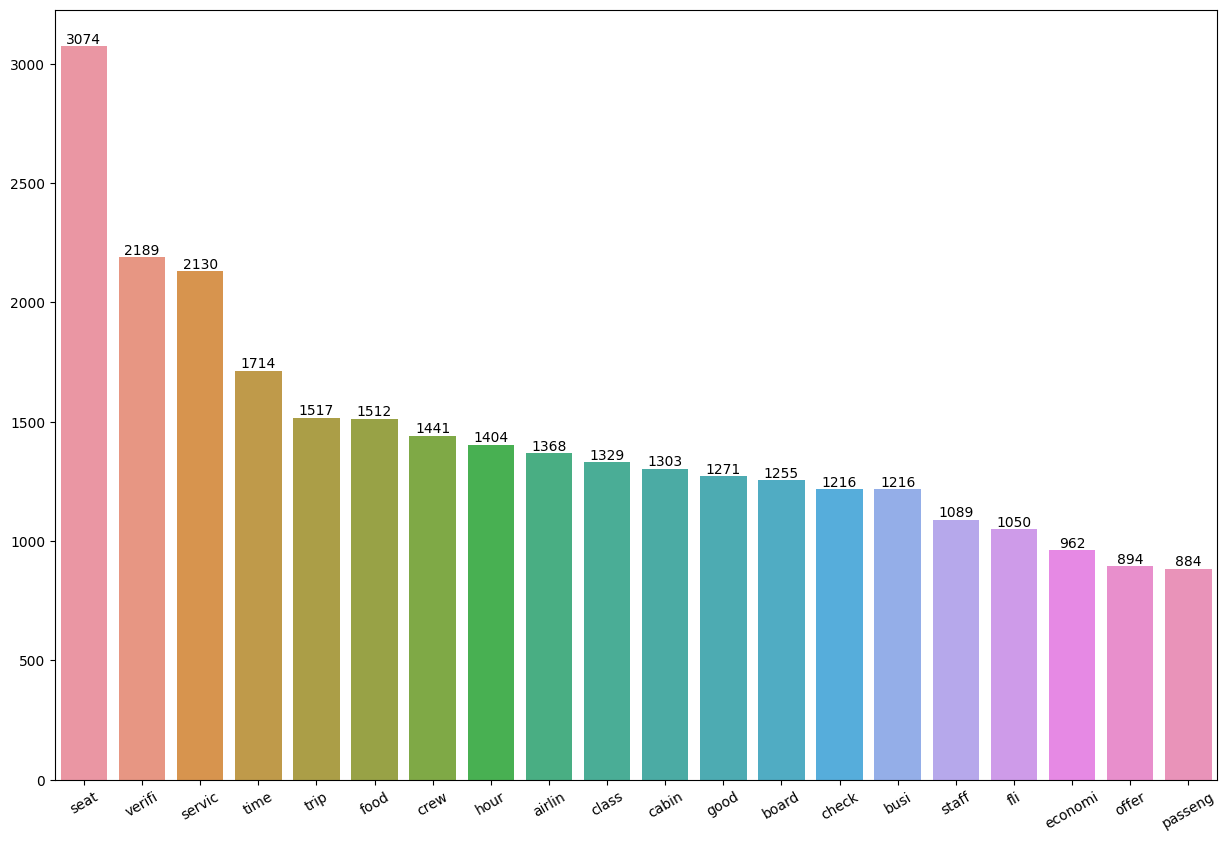

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

plot = sns.barplot(x=all_fdist.index,y=all_fdist.values, ax=ax)
plot.bar_label(plot.containers[0])
plt.xticks(rotation=30)
plt.show()